In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('data/insurance_data_raw.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Check data types for each column
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Droping Duplicates

In [3]:
data[data.duplicated()]
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [4]:
data.drop_duplicates(inplace=True)
data.shape    # 1337 rows × 7 columns

(1337, 7)

## Fixing Missing Values

In [5]:
data.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Imbalanced Data Check (per column)

### `age`

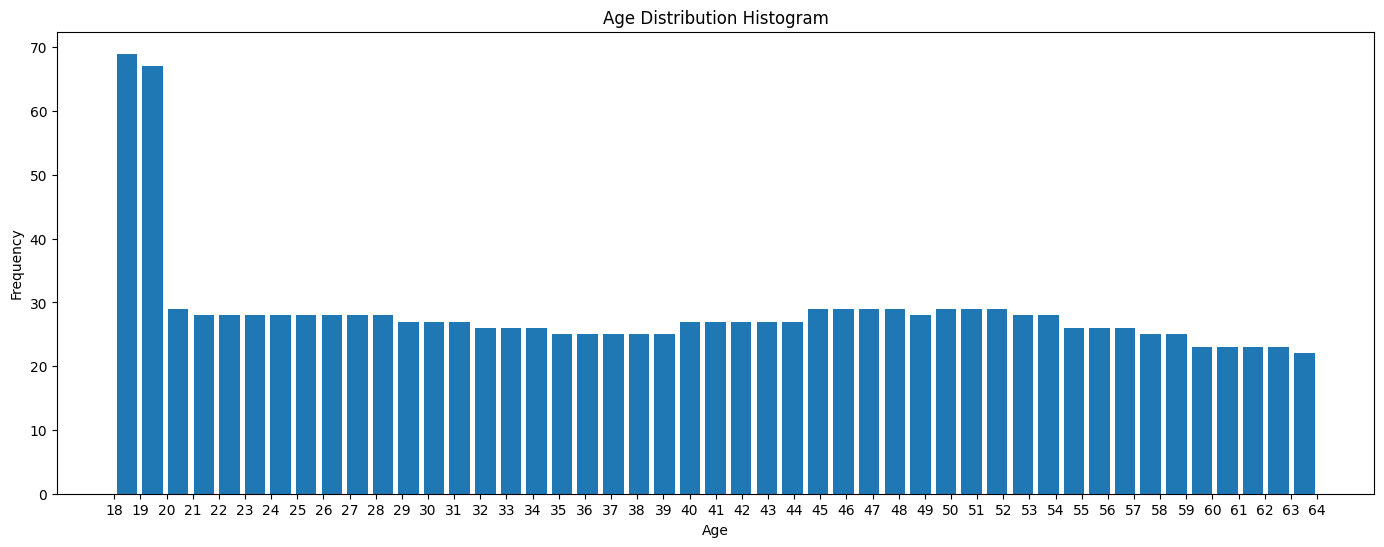

In [6]:
plt.figure(figsize=(17, 6))
plt.hist(data['age'], bins=len(data['age'].unique()), rwidth=0.8)
plt.title('Age Distribution Histogram')
plt.xticks(np.sort(data['age'].unique()))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.plot();

### `sex`

In [7]:
data['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

### `bmi`

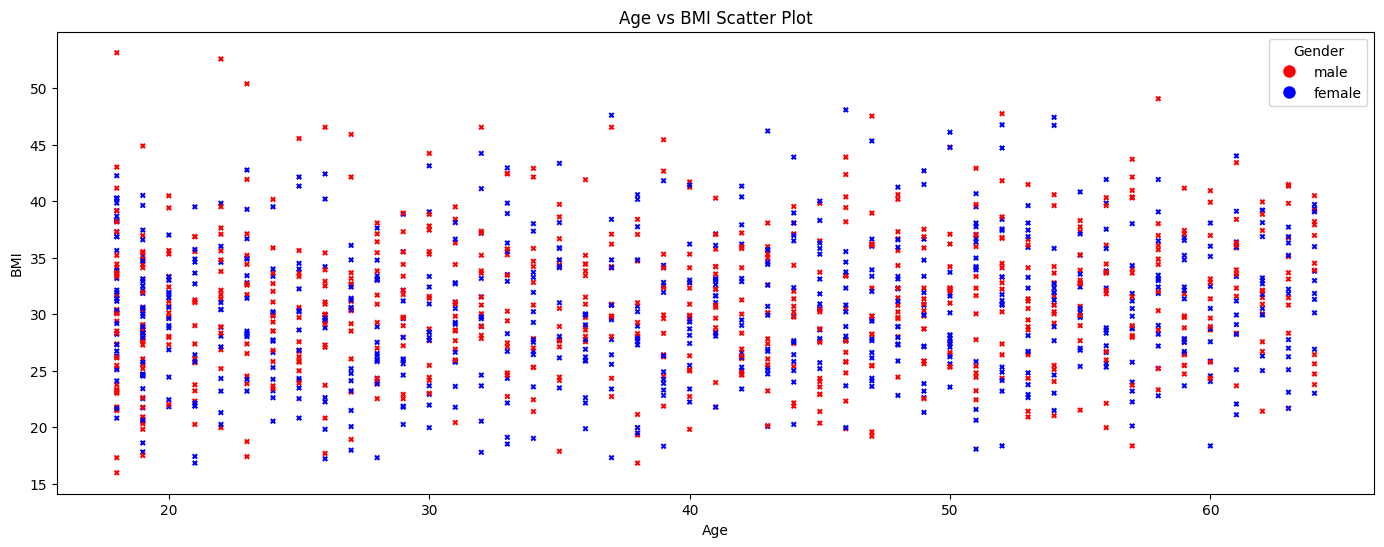

In [9]:
plt.figure(figsize=(17, 6))
color_map = {'male': 'red', 'female': 'blue'}
plt.scatter(x=data['age'], y=data['bmi'], c=data['sex'].map(color_map), s=10, marker='x')
plt.title('Age vs BMI Scatter Plot')
plt.xlabel('Age')
plt.ylabel('BMI')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map.values()]
plt.legend(handles, color_map.keys(), title='Gender')
plt.show();

### `children`

In [10]:
data['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### `smoker`

In [11]:
data['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

### `region`

In [12]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [13]:
# Save cleaned data
data.to_csv('data/insurance_data_cleaned.csv', index=False)